In [13]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import time

from datetime import datetime

In [14]:
# Import the API key.
from config import weather_api_key
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [15]:
# Create a set of random latitude and longitude combination
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [16]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [17]:
# Use the print() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

-2.2602950694620034 -107.38249563139065
45.39967506427584 166.6832139658992
-69.00350482489524 94.558186811783
54.81340014084219 174.53440382921013
-17.681169389622696 94.19291931772301
-63.025593414183916 31.198670104925213
-58.89294040762529 -109.20118237063936
88.0043182141452 -95.20719668405211
-44.17067522642501 -157.46578320277166
9.376769146910917 90.63030325019992
-50.83912058273896 155.27378655650244
-44.62322001054613 64.5330311982811
-35.99998424256931 179.46298961397042
9.525672113587731 110.21612286974675
38.50152055995622 -94.01947511401369
-75.89041478657953 -91.68088241627055
34.98306996004534 -11.103095505158905
44.6733589854737 106.59755723840448
-51.258394963050016 -49.185859965578544
44.63206189939393 34.818998723729635
-30.012911721855062 44.738059163267195
-77.73147395196843 -114.9793139467092
-25.715300127278766 111.56035044561105
13.096873265289304 49.25836632997786
-62.6326568519884 13.903583652277376
37.833423287978874 -31.293688582736365
83.28712668829976 -3.

In [18]:
from citipy import citipy

In [19]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

605

In [20]:
import requests
requests.__version__

'2.27.1'

In [21]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1


# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
   
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

    # Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")



Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | puerto ayora
Processing Record 2 of Set 1 | nikolskoye
Processing Record 3 of Set 1 | busselton
Processing Record 4 of Set 1 | bengkulu
Processing Record 5 of Set 1 | port elizabeth
Processing Record 6 of Set 1 | punta arenas
Processing Record 7 of Set 1 | qaanaaq
Processing Record 8 of Set 1 | mataura
Processing Record 9 of Set 1 | port blair
Processing Record 10 of Set 1 | hobart
Processing Record 11 of Set 1 | saint-philippe
Processing Record 12 of Set 1 | ruatoria
City not found. Skipping...
Processing Record 13 of Set 1 | phan rang
City not found. Skipping...
Processing Record 14 of Set 1 | clinton
Processing Record 15 of Set 1 | lagos
Processing Record 16 of Set 1 | mandalgovi
Processing Record 17 of Set 1 | mar del plata
Processing Record 18 of Set 1 | sudak
Processing Record 19 of Set 1 | tsihombe
City not found. Skipping...
Processing Record 20 of Set 1 | carnarvon
Processing Record 21 o

Processing Record 37 of Set 4 | ancud
Processing Record 38 of Set 4 | ilulissat
Processing Record 39 of Set 4 | goderich
Processing Record 40 of Set 4 | cabo san lucas
Processing Record 41 of Set 4 | povenets
Processing Record 42 of Set 4 | arraial do cabo
Processing Record 43 of Set 4 | nanortalik
Processing Record 44 of Set 4 | somerset west
Processing Record 45 of Set 4 | asyut
Processing Record 46 of Set 4 | kangalassy
Processing Record 47 of Set 4 | zyryanka
Processing Record 48 of Set 4 | tapes
Processing Record 49 of Set 4 | abha
Processing Record 50 of Set 4 | omsukchan
Processing Record 1 of Set 5 | alice springs
Processing Record 2 of Set 5 | khatanga
Processing Record 3 of Set 5 | kadykchan
City not found. Skipping...
Processing Record 4 of Set 5 | georgetown
Processing Record 5 of Set 5 | chumikan
Processing Record 6 of Set 5 | bathsheba
Processing Record 7 of Set 5 | nerchinskiy zavod
Processing Record 8 of Set 5 | provideniya
Processing Record 9 of Set 5 | kavieng
Process

Processing Record 24 of Set 8 | ponta delgada
Processing Record 25 of Set 8 | melito di porto salvo
Processing Record 26 of Set 8 | campagna
Processing Record 27 of Set 8 | dalbandin
Processing Record 28 of Set 8 | tura
Processing Record 29 of Set 8 | pergamino
Processing Record 30 of Set 8 | samarai
Processing Record 31 of Set 8 | mudgee
Processing Record 32 of Set 8 | mildura
Processing Record 33 of Set 8 | elizabeth city
Processing Record 34 of Set 8 | kpandae
Processing Record 35 of Set 8 | avanigadda
Processing Record 36 of Set 8 | geraldton
Processing Record 37 of Set 8 | anloga
Processing Record 38 of Set 8 | jumla
Processing Record 39 of Set 8 | ust-kamchatsk
City not found. Skipping...
Processing Record 40 of Set 8 | paka
Processing Record 41 of Set 8 | camrose
Processing Record 42 of Set 8 | iberia
Processing Record 43 of Set 8 | buraydah
Processing Record 44 of Set 8 | iquitos
Processing Record 45 of Set 8 | kruisfontein
Processing Record 46 of Set 8 | quatre cocos
Processin

Processing Record 15 of Set 12 | piedecuesta
Processing Record 16 of Set 12 | ulaanbaatar
Processing Record 17 of Set 12 | a
City not found. Skipping...
Processing Record 18 of Set 12 | tashtyp
Processing Record 19 of Set 12 | kolaras
Processing Record 20 of Set 12 | mecca
Processing Record 21 of Set 12 | isangel
Processing Record 22 of Set 12 | northam
Processing Record 23 of Set 12 | ambon
Processing Record 24 of Set 12 | naliya
Processing Record 25 of Set 12 | orjahovo
City not found. Skipping...
Processing Record 26 of Set 12 | manono
Processing Record 27 of Set 12 | ayios matthaios
City not found. Skipping...
Processing Record 28 of Set 12 | taoudenni
Processing Record 29 of Set 12 | kurumkan
Processing Record 30 of Set 12 | umm lajj
Processing Record 31 of Set 12 | goya
Processing Record 32 of Set 12 | pacific grove
Processing Record 33 of Set 12 | acajutla
Processing Record 34 of Set 12 | kefamenanu
Processing Record 35 of Set 12 | shitanjing
Processing Record 36 of Set 12 | bat

In [22]:
len(city_data)

556

In [23]:
city_data_df = pd.DataFrame(city_data)
city_data_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Puerto Ayora,-0.7393,-90.3518,75.16,92,77,5.01,EC,2022-06-29 21:15:05
1,Nikolskoye,59.7035,30.7861,64.29,63,0,3.36,RU,2022-06-29 21:15:05
2,Busselton,-33.6500,115.3333,47.93,85,0,10.22,AU,2022-06-29 21:11:41
3,Bengkulu,-3.8004,102.2655,73.63,88,100,12.93,ID,2022-06-29 21:15:07
4,Port Elizabeth,-33.9180,25.5701,46.69,76,0,4.61,ZA,2022-06-29 21:15:08
...,...,...,...,...,...,...,...,...,...
551,Ruhengeri,-1.4998,29.6350,58.12,83,96,2.21,RW,2022-06-29 21:31:36
552,Lakatoro,-16.0999,167.4164,79.92,79,55,15.01,VU,2022-06-29 21:31:36
553,Makakilo City,21.3469,-158.0858,86.32,51,40,14.97,US,2022-06-29 21:31:37
554,Kismayo,-0.3582,42.5454,76.03,82,84,20.47,SO,2022-06-29 21:31:37


In [24]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df[new_column_order]

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Puerto Ayora,EC,2022-06-29 21:15:05,-0.7393,-90.3518,75.16,92,77,5.01
1,Nikolskoye,RU,2022-06-29 21:15:05,59.7035,30.7861,64.29,63,0,3.36
2,Busselton,AU,2022-06-29 21:11:41,-33.6500,115.3333,47.93,85,0,10.22
3,Bengkulu,ID,2022-06-29 21:15:07,-3.8004,102.2655,73.63,88,100,12.93
4,Port Elizabeth,ZA,2022-06-29 21:15:08,-33.9180,25.5701,46.69,76,0,4.61
...,...,...,...,...,...,...,...,...,...
551,Ruhengeri,RW,2022-06-29 21:31:36,-1.4998,29.6350,58.12,83,96,2.21
552,Lakatoro,VU,2022-06-29 21:31:36,-16.0999,167.4164,79.92,79,55,15.01
553,Makakilo City,US,2022-06-29 21:31:37,21.3469,-158.0858,86.32,51,40,14.97
554,Kismayo,SO,2022-06-29 21:31:37,-0.3582,42.5454,76.03,82,84,20.47


In [25]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [26]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

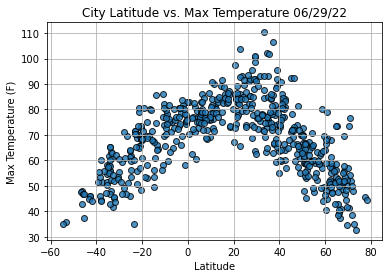

In [27]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

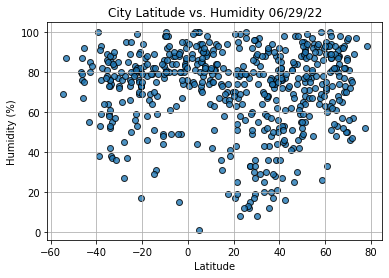

In [28]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

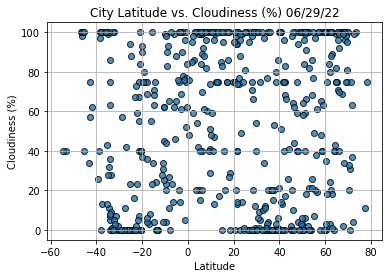

In [29]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(lats,
           cloudiness,
           edgecolor="black", linewidth=1, marker="o", alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig("weather_data/Fig3.png")

plt.show

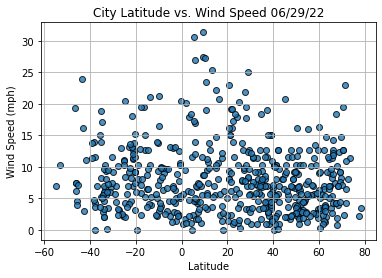

In [30]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [31]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    
    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
    
    
    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [32]:
index13 = city_data_df.loc[13]
index13

City                   Mandalgovi
Lat                       45.7625
Lng                      106.2708
Max Temp                    69.15
Humidity                       42
Cloudiness                     64
Wind Speed                  10.29
Country                        MN
Date          2022-06-29 21:15:16
Name: 13, dtype: object

In [34]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
1,Nikolskoye,59.7035,30.7861,64.29,63,0,3.36,RU,2022-06-29 21:15:05
6,Qaanaaq,77.4840,-69.3632,45.81,52,11,2.26,GL,2022-06-29 21:15:10
8,Port Blair,11.6667,92.7500,81.52,81,99,10.80,IN,2022-06-29 21:15:12
11,Clinton,42.5870,-82.9199,84.27,61,75,6.91,US,2022-06-29 21:15:16
12,Lagos,6.5833,3.7500,76.42,90,100,6.78,NG,2022-06-29 21:13:18


In [35]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

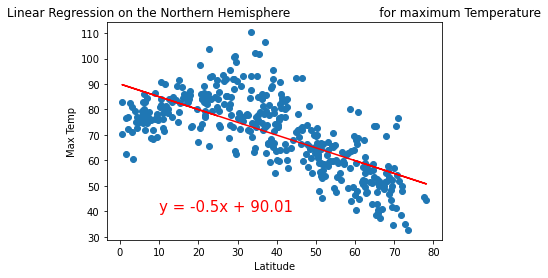

In [48]:
#linear regression on the Northen Hemi Lat vs Max Temp

x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]

#call the function 
plot_linear_regression(x_values, y_values,
                      'Linear Regression on the Northern Hemisphere \
                      for maximum Temperature', 'Max Temp',(10,40))
                       

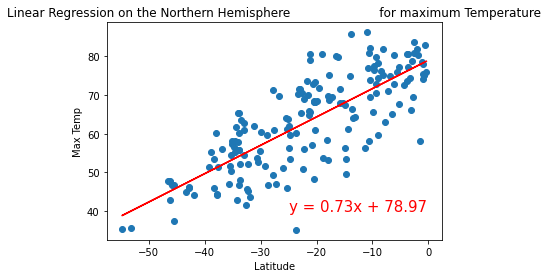

In [58]:
#linear regression on the Southern Hemi Lat vs Max Temp

x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]

#call the function 
plot_linear_regression(x_values, y_values,
                      'Linear Regression on the Northern Hemisphere \
                      for maximum Temperature', 'Max Temp',(-25,40))

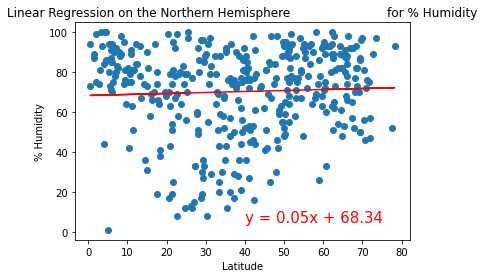

In [63]:
# Linear regression on the Northern Hemi Lat vs Humidity 
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]

#call the fuction 
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,5))

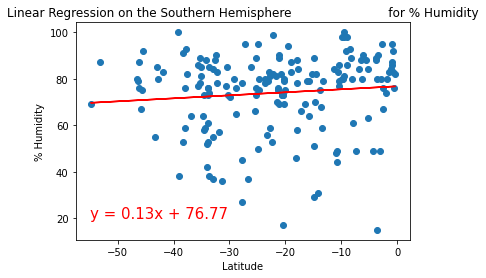

In [69]:
# Linear regression on the Southern Hemi Lat vs Humidity 
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]

#call the fuction 
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-55,20))

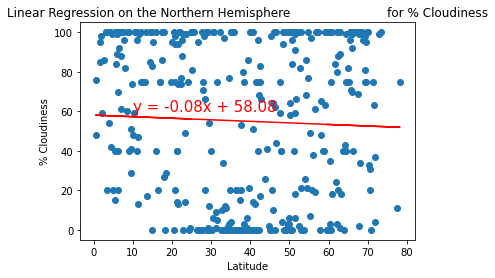

In [73]:
# Linear regression on the Northern Hemi Lat vs Cloudiness 
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]

#call the fuction 
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(10,60))

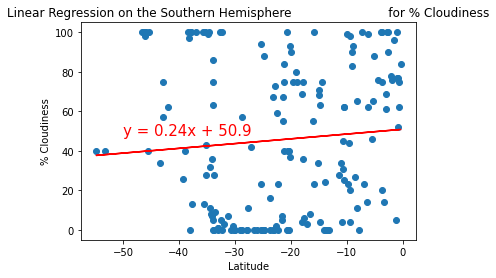

In [77]:
# Linear regression on the Southern Hemi Lat vs Cloudiness 
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]

#call the fuction 
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,48))

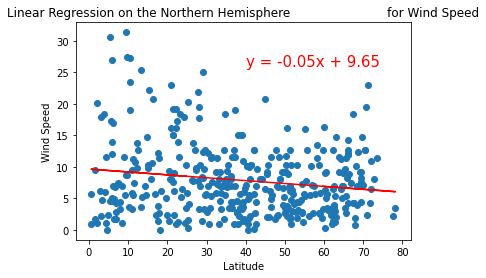

In [82]:
# Linear regression on the Northern Hemi Lat vs Wind Speed 
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]

#call the fuction 
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,26))

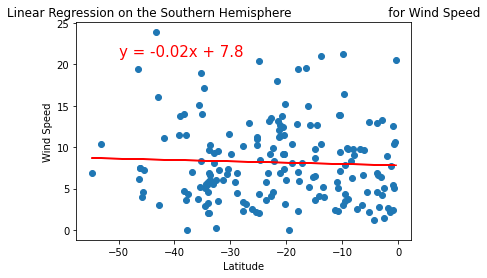

In [84]:
# Linear regression on the Southern Hemi Lat vs Cloudiness 
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]

#call the fuction 
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,21))